In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as py 
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./analyze_me.csv")

# Jumpan23 Analysis by Kai Lin


## Exploratory Analysis

In [3]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [4]:
df.shape

(5983, 18)

Let's check data types for each field to see if ther are correctly assigned. 

In [5]:
#Check data types
df.dtypes

delivery_id                              int64
customer_id                              int64
jumpman_id                               int64
vehicle_type                            object
pickup_place                            object
place_category                          object
item_name                               object
item_quantity                          float64
item_category_name                      object
how_long_it_took_to_order               object
pickup_lat                             float64
pickup_lon                             float64
dropoff_lat                            float64
dropoff_lon                            float64
when_the_delivery_started               object
when_the_Jumpman_arrived_at_pickup      object
when_the_Jumpman_left_pickup            object
when_the_Jumpman_arrived_at_dropoff     object
dtype: object

### Missing Values

Let's check for NULLs within this dataset. We can see that a number of orders are missing the following fields: 

* place_category     
* item_name                              
* item_quantity                          
* item_category_name                     
* how_long_it_took_to_order
* when_the_Jumpman_arrived_at_pickup     
* when_the_Jumpman_left_pickup 

This raises some red flags in particular how_long_it_took_to_order as almost half of the entries are unavailable. 


In [6]:
df.isnull().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

In [7]:
#Check summary
df.describe()

,delivery_id,customer_id,jumpman_id,item_quantity,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
count,5.983000e+03,5983.000000,5983.000000,4753.000000,5983.000000,5983.000000,5983.000000,5983.000000
mean,1.379495e+06,176472.595521,102661.602541,1.248264,40.741425,-73.987101,40.744216,-73.985765
std,6.459397e+04,116414.487842,48607.211795,0.785904,0.022833,0.014896,0.025251,0.018060
min,1.271706e+06,242.000000,3296.000000,1.000000,40.665611,-74.015837,40.649356,-74.017679
25%,1.322792e+06,77817.000000,60761.000000,1.000000,40.724340,-73.996630,40.725307,-74.000297
50%,1.375689e+06,131093.000000,113364.000000,1.000000,40.735677,-73.988682,40.740424,-73.989280
75%,1.436371e+06,293381.000000,143807.000000,1.000000,40.758726,-73.980739,40.763885,-73.974696
max,1.491424e+06,405547.000000,181543.000000,16.000000,40.818082,-73.920980,40.848324,-73.924124


In [8]:
#Check for number of unique values
df.nunique()

delivery_id                            5214
customer_id                            3192
jumpman_id                              578
vehicle_type                              7
pickup_place                            898
place_category                           57
item_name                              2277
item_quantity                            11
item_category_name                      767
how_long_it_took_to_order              2579
pickup_lat                             1210
pickup_lon                             1179
dropoff_lat                            2841
dropoff_lon                            2839
when_the_delivery_started              5214
when_the_Jumpman_arrived_at_pickup     4719
when_the_Jumpman_left_pickup           4717
when_the_Jumpman_arrived_at_dropoff    5214
dtype: int64

### Mode of Transport

From our analysis below, bicycle is by far the most common mode of transportation. This followed by car, walking and van. 

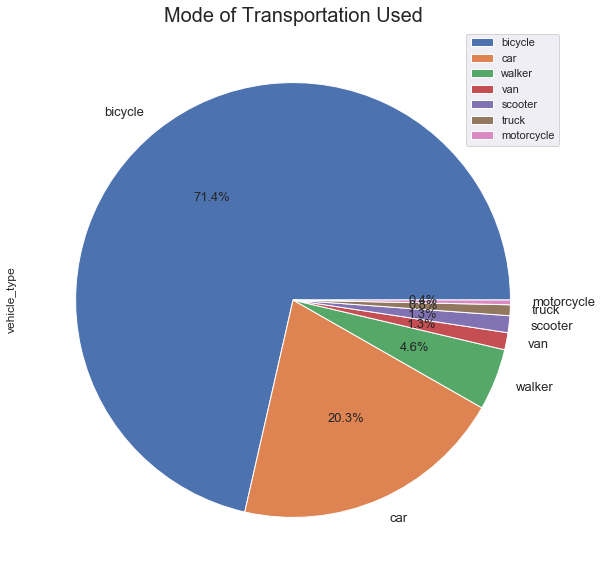

In [9]:
vehcile = df.vehicle_type.value_counts(normalize=0)

sns.set()
vehcile.plot(kind='pie', figsize=[10,10], fontsize=13,autopct='%1.1f%%')
plt.title('Mode of Transportation Used', fontsize=20)
plt.legend();

### Popular Category Types


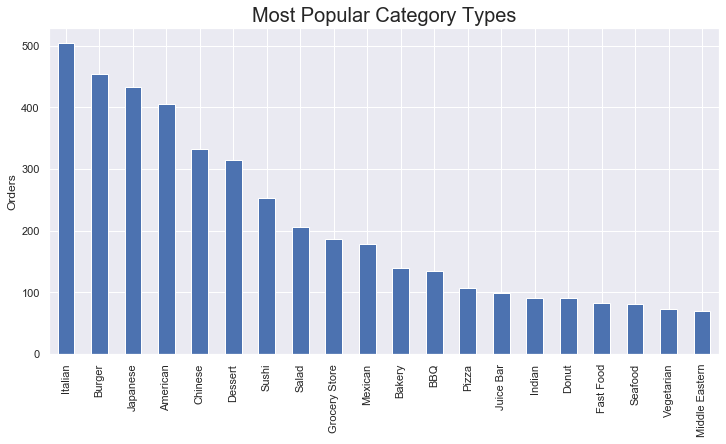

In [10]:
plt.figure(figsize=(12,6))
plt.ylabel('Orders') 
plt.title('Most Popular Category Types',fontsize=20) 
df['place_category'].value_counts().iloc[:20].plot(kind='bar');

### Unique and duplicate records

Let's look at how long it took to take a order. There a total of 3038 records for this field however only 2579 are unique. This suggest that 459 of these records have identical times. We will further evaluate this. 

In [11]:
df.how_long_it_took_to_order.describe()

count               3038
unique              2579
top       00:03:20.15586
freq                   5
Name: how_long_it_took_to_order, dtype: object

In [12]:
df.groupby(['how_long_it_took_to_order','delivery_id']).size().reset_index(name='counts').sort_values(['counts'], ascending=False).head(15)


,how_long_it_took_to_order,delivery_id,counts
302,00:03:20.15586,1460296,5
1120,00:05:38.163633,1343610,4
2376,00:15:18.022735,1374803,4
1201,00:05:52.918337,1348963,4
1736,00:07:50.386058,1475127,4
1353,00:06:19.883106,1458212,4
2136,00:10:48.836045,1286826,4
2353,00:14:36.885354,1368206,4
1783,00:08:04.428529,1302788,4
1428,00:06:36.262226,1439953,4


With further analysis, it appears these duplicates are multiples items belonging to one delivery order. It's important to note we do not count these as seperate orders. 

In [13]:
df[df['delivery_id']==1460296]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
2599,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Bistec,1.0,Tacos,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3510,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Tortilla,1.0,Soups,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
3796,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Chips & La Esquina's Own Salsa Roja,1.0,Plates,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4056,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Canned Soda,1.0,Cold Drinks,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842
4487,1460296,155145,39202,bicycle,La Esquina Taqueria,NaN,Elotes Callejeros,1.0,Sides,00:03:20.15586,40.721354,-73.997525,40.736889,-73.983087,2014-10-26 16:55:46.106588,2014-10-26 17:06:24.09911,2014-10-26 17:15:44.699287,2014-10-26 17:26:44.885842


## Duration

Let's examine the different time intervals from when the delivery started to finish.

In [14]:
# convert to how_long_it_took_to_order to time format
df['how_long_it_took_to_order'] = pd.to_datetime(df.how_long_it_took_to_order, format = '%H:%M:%S.%f')


In [15]:
#Convert to proper time fields
df.when_the_delivery_started= pd.to_datetime(df.when_the_delivery_started)
df.when_the_Jumpman_arrived_at_pickup= pd.to_datetime(df.when_the_Jumpman_arrived_at_pickup)
df.when_the_Jumpman_left_pickup = pd.to_datetime(df.when_the_Jumpman_left_pickup)
df.when_the_Jumpman_arrived_at_dropoff= pd.to_datetime(df.when_the_Jumpman_arrived_at_dropoff)

In [16]:
#Calculate duration for the 3 intervals
df['time_start_to_pickup'] = df.when_the_Jumpman_arrived_at_pickup - df.when_the_delivery_started
df['time_pickup_to_left'] = df.when_the_Jumpman_left_pickup - df.when_the_Jumpman_arrived_at_pickup
df['time_left_to_dropoff'] = df.when_the_Jumpman_arrived_at_dropoff - df.when_the_Jumpman_left_pickup

### Irregularities in time_start_to_pickup

If we look at the time interval from when the delivery started to when the Jumpman arrived at pickup, there appears to be some irregulaties. There are 501 instances where the deliverer arrived at pickup BEFORE the delivery started. There are orders where 'time_start_to_pickup' is less than zero. These delivery instances should be further investigated and how these fields are exactly defined. 

In [17]:
#Examples of orders where Jumpman arrived at pickup before delivery started
Irr_time_start_to_pickup = df[(df['time_start_to_pickup'] < pd.Timedelta(0,'s'))]
Irr_time_start_to_pickup.reset_index(inplace = True, drop=True) 
Irr_time_start_to_pickup.iloc[:5]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,time_start_to_pickup,time_pickup_to_left,time_left_to_dropoff
0,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,1900-01-01 00:06:44.541717,...,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.984810,2014-10-28 22:04:40.634962,-1 days +23:57:26.139011,00:21:51.191405,00:05:30.650152
1,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1.0,Classic Roll & Hand Roll,1900-01-01 00:04:49.413655,...,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548,-1 days +23:58:20.476366,00:22:08.534419,00:10:37.196837
2,1311619,59161,79847,bicycle,Insomnia Cookies,Bakery,Chocolate Chunk,2.0,Cookies and Brownies,NaT,...,-74.000589,40.734703,-73.998206,2014-10-06 23:20:09.312584,2014-10-06 23:17:35.666950,2014-10-07 00:03:24.389592,2014-10-07 00:09:16.559521,-1 days +23:57:26.354366,00:45:48.722642,00:05:52.169929
3,1324131,334758,90681,bicycle,Melt Shop,American,Cheesy Tots,1.0,Sides & Snacks,1900-01-01 00:08:50.378398,...,-73.990742,40.763320,-73.993809,2014-10-09 15:32:43.974085,2014-10-09 15:32:18.537789,2014-10-09 15:51:08.623130,2014-10-09 16:03:53.278308,-1 days +23:59:34.563704,00:18:50.085341,00:12:44.655178
4,1365392,41415,142301,bicycle,Clinton St. Baking Co. & Restaurant,NaN,Pancakes with Warm Maple Butter,1.0,Brunch,1900-01-01 00:03:53.585842,...,-73.983994,40.743140,-73.996904,2014-10-15 09:34:44.574598,2014-10-15 09:34:17.550238,2014-10-15 09:54:09.214336,2014-10-15 10:07:50.730760,-1 days +23:59:32.975640,00:19:51.664098,00:13:41.516424


In [18]:
#Total number of such irregularities
len(Irr_time_start_to_pickup)

501

However, looking at the duration between when_the_Jumpman_arrived_at_pickup to when_the_Jumpman_left_pickup, there appears to be no incidiences where the timestamp Jumpman_left_pickup was before arrived_at_pickup

In [19]:
#Orders where Jumpman arrived at pickup before 
df[(df['time_pickup_to_left'] < pd.Timedelta(0,'s'))]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,time_start_to_pickup,time_pickup_to_left,time_left_to_dropoff


If we look at the duration between when_the_Jumpman_left_pickup to when_the_Jumpman_arrived_at_dropoff, there are no incidences of negative duration.

In [20]:
#Orders where Jumpman arrived at pickup before 
df[(df['time_left_to_dropoff'] < pd.Timedelta(0,'s'))]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,...,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff,time_start_to_pickup,time_pickup_to_left,time_left_to_dropoff


### Start to Pickup
We can see there a 2 deliveries where start to picukp took more than 120 minutes. These outliers should be investigated to see if the entry was correct. 

In [21]:
# sort by time_start_to_pickup
df[['delivery_id','customer_id','jumpman_id','time_start_to_pickup']].sort_values('time_start_to_pickup',ascending=False).iloc[:2]

,delivery_id,customer_id,jumpman_id,time_start_to_pickup
3983,1474801,112380,118093,02:22:05.407471
1317,1400555,337756,114469,02:08:33.710712


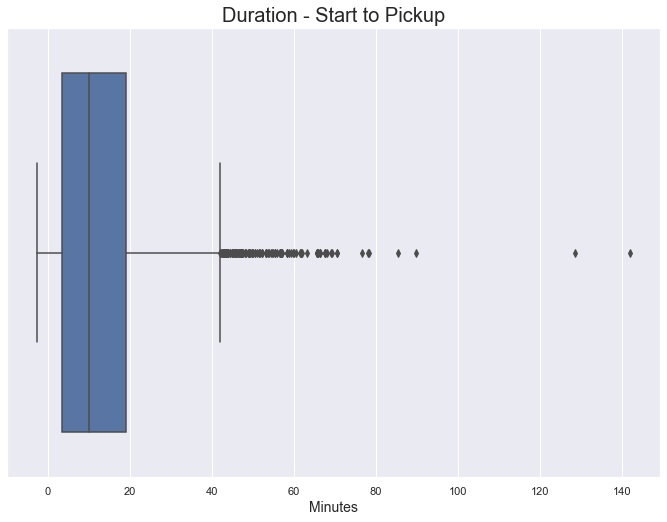

In [22]:
#Covert time_pickup_to_left to minutes to display 
time_start_to_pickup_mins = df['time_start_to_pickup'] / np.timedelta64(1, 'm')

#Drop NaN
time_start_to_pickup_mins=time_start_to_pickup_mins.dropna().tolist()

#Box Plot
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(time_start_to_pickup_mins)
plt.title('Duration - Start to Pickup', fontsize=20)
plt.xlabel('Minutes', fontsize=14);


### Pickup to Leaving
Sorting by time_pickup_to_left, we can see there was one instance (delivery_id = 1381673) where it took 4hr27m. This appears anomaly and should be investigated why this delivery took so long. 

In [23]:
# sort by time_start_to_pickup
df[['delivery_id','customer_id','jumpman_id','time_pickup_to_left']].sort_values('time_pickup_to_left',ascending=False).iloc[:5]

,delivery_id,customer_id,jumpman_id,time_pickup_to_left
1606,1381673,377260,166715,04:27:57.242617
3356,1347642,100889,15291,01:55:49.595611
2873,1347642,100889,15291,01:55:49.595611
335,1347642,100889,15291,01:55:49.595611
5969,1347642,100889,15291,01:55:49.595611


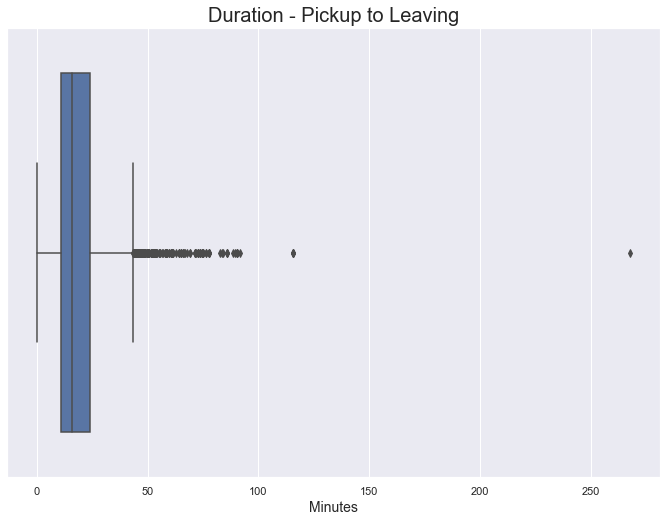

In [24]:
#Covert time_pickup_to_left to minutes to display 
time_pickup_to_left_mins = df['time_pickup_to_left'] / np.timedelta64(1, 'm')

#Drop NaN
time_pickup_to_left_mins=time_pickup_to_left_mins.dropna().tolist()

#Box Plot
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(time_pickup_to_left_mins)
plt.title('Duration - Pickup to Leaving', fontsize=20)
plt.xlabel('Minutes', fontsize=14);


### Leaving Pickup Arriving at dropoff
Similarly, if we look at the duration leaving the pickup to arriving at the dropoff, there appear to be outliers. The longest delivery (delivery_id=1473443), this took 1hr59m to complete.

In [25]:
# sort by time_start_to_pickup
df[['delivery_id','customer_id','jumpman_id','time_left_to_dropoff']].sort_values('time_left_to_dropoff',ascending=False).iloc[:5]

,delivery_id,customer_id,jumpman_id,time_left_to_dropoff
4787,1473443,133436,173409,01:59:11.403614
5676,1428160,36131,164384,01:36:31.812340
2314,1360773,86013,153795,01:31:38.986752
1612,1433815,47470,137891,01:25:33.298577
3737,1293159,68559,65038,01:23:28.767634


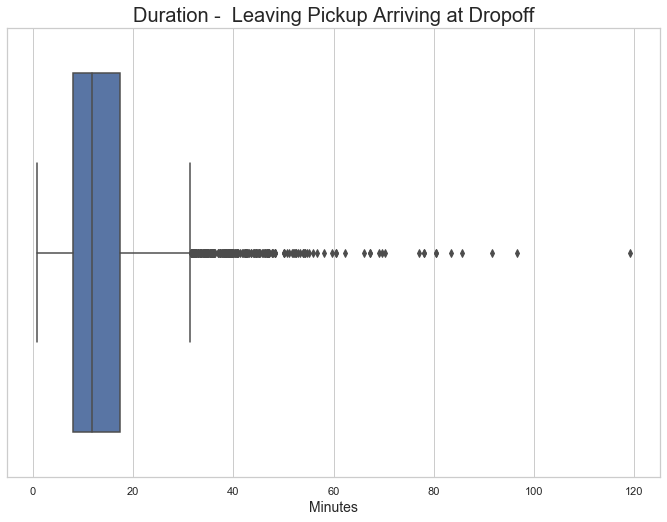

In [26]:
#Covert time_pickup_to_left to minutes
time_left_to_dropoff_mins = df['time_left_to_dropoff'] / np.timedelta64(1, 'm')

#Drop NaN
time_left_to_dropoff_mins=time_left_to_dropoff_mins.dropna().tolist()

#Box Plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(time_left_to_dropoff_mins)
plt.title('Duration -  Leaving Pickup Arriving at Dropoff', fontsize=20)
plt.xlabel('Minutes', fontsize=14);
